In [69]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [71]:
from keras.datasets import mnist

In [72]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [73]:
X_train.shape

(60000L, 28L, 28L)

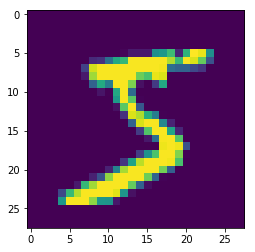

In [74]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

plt.show()

In [75]:
#Reshape input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [76]:
X_train.shape

(60000L, 28L, 28L, 1L)

In [77]:
#Convert datatype and normalize the values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [78]:
y_train.shape

(60000L,)

In [79]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [80]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [81]:
Y_train.shape

(60000L, 10L)

In [82]:
#declare sequential model
model = Sequential()

In [83]:
#CNN input layer
#1, 28, 28 corresponds to depth, width height
model.add(Conv2D(activation="relu", filters=32, kernel_size=(3,3), input_shape=(28, 28, 1)))

In [84]:
model.output_shape

(None, 26, 26, 32)

In [85]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [86]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [87]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [88]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.1989 - acc: 0.9392
Epoch 2/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0840 - acc: 0.9746
Epoch 3/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0620 - acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0525 - acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0429 - acc: 0.9866
Epoch 6/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0416 - acc: 0.9866
Epoch 7/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0363 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0330 - acc: 0.9891
Epoch 9/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0308 - acc: 0.9901
Epoch 10/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0271 - a

In [89]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [90]:
score

[0.02781087428694359, 0.99239999999999995]

In [91]:
#More details: https://elitedatascience.com/keras-tutorial-deep-learning-in-python